필요 모듈, 패키지, 라이브러리 설치

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install konlpy

In [3]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import konlpy
from konlpy.tag import Okt
okt = Okt() # 형태소 추출
from konlpy.tag import Twitter # 한글 형태소 추출

from collections import Counter # count 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 데이터 불러오기

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Zipbob_textmining/youtubecomment.csv',encoding='cp949')

In [6]:
df.head()

,title,video,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디


In [7]:
df.shape

(9182, 3)

In [8]:
df=df.dropna(how='any')

In [9]:
df.shape

(9179, 3)

In [10]:
df['comment']

0       대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1                                                맛나겠네요 ㅎㅎ
2                                             믹서기를 사야겄네..
3               골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4                                                나중에 해줘야디
                              ...                        
9177                                 꼭 해봐야겠네요 맛있게 잘 될것같아요
9178                     배즙 말고 다른 재료는 어떤게 있을까요? 배가 많이 비싸요
9179                                            좋아요 꾹 입니다
9180    수박을 열무랑 함께하면 무슨 맛일까..? 궁금해서 저도 열무,얼갈이 사러 갑니다.ㅎ...
9181                                과일주스 만드는 방법좀 알려주세요~~~
Name: comment, Length: 9179, dtype: object

# 정규 표현식 적용

In [13]:
import re

# 정규 표현식 함수 정의
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [14]:
# 리스트는 안 되고 str 하나만 가능
apply_regular_expression('우리너무 ^^ 멋져요★')

'우리너무  멋져요'

# 한국어 형태소 분석 - 명사 단위

In [16]:
from konlpy.tag import Okt
from collections import Counter

# apply함수로 특수문자를 없앤 문장덩어리를 명사로 쪼개는 okt

okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression('우리친구너무 ^^ 멋있어요★'))
nouns

['우리', '친구']

# 전체 말뭉치(corpus)에 적용해서 명사 형태소를 추출
- 특수문자를 제거한 전체 한국어로만 되어있는 뭉치를 코퍼스라 함

In [17]:
# 말뭉치 생성
# df에 행으로 나눠진 series들을 하나의 뭉치로 만듬
# 그리고 그 다음 apply적용하고 -> okt로 명사 추출

corpus = "".join(df['comment'].tolist())
corpus

'대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아요 병원서 남편 간병하고있는데 콩요리를 좋아해서 집에가면 꼭 해먹어보고 싶네요 감사요~^^맛나겠네요 ㅎㅎ믹서기를 사야겄네..골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~나중에 해줘야디항상 감사합니다!백쌤 쉽게 멋나게 잘 배우고 따라 해볼게유 고맙습니다~♡Vega: 다진김치 추가~~요^^신김치 잘게 썰어 넣으면 훨씬 맛있고요 검은콩으로 만들면 더 고소해요~ ㅎ 몇달전에 지난 여름 콩국수 만들어 먹고 삶아놓은 콩이 많이 남았는데 갑자기 녹두빈대떡 생각나서 녹두와 비슷한 냉동보관중이었던 콩을 꺼내 믹서기에 갈고 신 김치 잘게 썰어 넣어 부쳐 먹어 봤는데 맛이 녹두빈대떡과 비슷하고 진짜 고소하고 맛있었어요 그때는 부침가루를 조금만 넣어서인지 반죽이 약간 질척거렸어요 혹시나 해서 콩전 검색해보니 백쌤이 최근에 레시피 올려주셨네요ㅋ이거 진짜 간단하고 좋네요. 먹는다고 사놓고 안 쓰는 콩 쓰기 최고인듯비지로 못 쓰나요?콩 싫어해서 한번 만들어서 먹어봐는데.. 그닥 &gt;~&lt;;; 청양고추 없이 했는데 그래서 맛이... 콩 싫어해서 시도해봐는데 전 실패인듯해요;;; 만들어놓은 반죽 아까워요ㅠㅠ 묶은콩?이라서 그런가?ㅜㅜ 아무튼 전 실패.. ㅜㅜ이거 진짜임 내가 콩을 진짜로 싫어해서 살면서 콩을 씹어본적도 없는데 신기하게 콩을 갈아서 요리하면 다맛있더라고요.오늘 콩전 했어요. 간고기넣고요 맛나요~~~두부로도 해도 되려나요? ㅎㅎ맛있어요 :) 근데 저는 좀 더 고소하면 좋을 것 같운데 뭘 넣어야 할까요 !?계란후라이용 프라이팬 거기다가 하시면 모양 죽여줍니다^^콩전 조치요. 캬!~~막걸리 한잔까지..ㅎㅎ맛있게 배워갑니당.음~~^.~♡ 맛나겠어유~~^.~♡ 멋지세유~~^.~♡Bin-De Tuck reads better for English speakers백대표님.콩전잘배웠어요감사합니다??Can someone tell me how to make the dipping

- 하나의 말뭉치로 만들어서, apply\_regular\_expression 함수 적용 가능

In [18]:
apply_regular_expression(corpus)
# 특수문자나 기호가 사라짐. ㅋ 나 ㅎ 은 그대로

'대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아요 병원서 남편 간병하고있는데 콩요리를 좋아해서 집에가면 꼭 해먹어보고 싶네요 감사요맛나겠네요 ㅎㅎ믹서기를 사야겄네골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬ㅋ 뉴욕사는 딸에게 공유했답니다나중에 해줘야디항상 감사합니다백쌤 쉽게 멋나게 잘 배우고 따라 해볼게유 고맙습니다 다진김치 추가요신김치 잘게 썰어 넣으면 훨씬 맛있고요 검은콩으로 만들면 더 고소해요 ㅎ 몇달전에 지난 여름 콩국수 만들어 먹고 삶아놓은 콩이 많이 남았는데 갑자기 녹두빈대떡 생각나서 녹두와 비슷한 냉동보관중이었던 콩을 꺼내 믹서기에 갈고 신 김치 잘게 썰어 넣어 부쳐 먹어 봤는데 맛이 녹두빈대떡과 비슷하고 진짜 고소하고 맛있었어요 그때는 부침가루를 조금만 넣어서인지 반죽이 약간 질척거렸어요 혹시나 해서 콩전 검색해보니 백쌤이 최근에 레시피 올려주셨네요ㅋ이거 진짜 간단하고 좋네요 먹는다고 사놓고 안 쓰는 콩 쓰기 최고인듯비지로 못 쓰나요콩 싫어해서 한번 만들어서 먹어봐는데 그닥  청양고추 없이 했는데 그래서 맛이 콩 싫어해서 시도해봐는데 전 실패인듯해요 만들어놓은 반죽 아까워요ㅠㅠ 묶은콩이라서 그런가ㅜㅜ 아무튼 전 실패 ㅜㅜ이거 진짜임 내가 콩을 진짜로 싫어해서 살면서 콩을 씹어본적도 없는데 신기하게 콩을 갈아서 요리하면 다맛있더라고요오늘 콩전 했어요 간고기넣고요 맛나요두부로도 해도 되려나요 ㅎㅎ맛있어요  근데 저는 좀 더 고소하면 좋을 것 같운데 뭘 넣어야 할까요 계란후라이용 프라이팬 거기다가 하시면 모양 죽여줍니다콩전 조치요 캬막걸리 한잔까지ㅎㅎ맛있게 배워갑니당음 맛나겠어유 멋지세유      백대표님콩전잘배웠어요감사합니다            궁금한게 보통 왜 콩이나 곡물들을 불리나요 어차피 끓일때 수분이들어가지않나요보기도 싫다 콩한알에 밥알이 몇갠지 기분 나쁜 부부이다 짜식 우렁각시를  약오른다티브에서 백종원이 나오는거 좀 안봤으면 좋겠다오늘 처치곤란 병아리콩으로 해봤는데 광장시장 빈대떡맛이나요 백쌤 장아찌간장에 담

In [20]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns[:30])

['대부분', '레시피', '요리', '정도', '더', '이해', '병원', '남편', '간병', '콩', '요리', '집', '가면', '꼭', '해먹', '보고', '감사', '맛', '믹서기', '겄', '골목', '막걸리', '란', '콩', '전이', '캬', '뉴욕', '딸', '공유', '나중']


In [21]:
len(nouns)

64875

# 빈도 탐색 - Counter 사용

In [22]:
# 파이썬에 내장된 개수 세는 counter함수
counter = Counter(nouns)

In [ ]:
#counter[:10] # 리스트 형태는 아니라서 [] index로 잘라내기 불가능

In [24]:
type(counter), len(counter)
# 64875의 okt로 추출된 명사들 중에서 고유값 unique한 것들은 6107개

(collections.Counter, 6107)

In [25]:
len(counter.most_common(20))

20

# 한글자 명사 제거
- 단어 길이가 2 이상(1초과)인 단어만 available에 추가하고 다시 상위 10개 추출

In [26]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

[('요리', 864),
 ('선생님', 770),
 ('진짜', 724),
 ('백종원', 635),
 ('레시피', 458),
 ('정말', 446),
 ('설탕', 402),
 ('음식', 365),
 ('오늘', 343),
 ('버터', 342)]

In [27]:
testlist = list(available_counter)
# counter로 뽑아내더라도, 리스트로 담아내면 counter함수 성질 잃어버려서 개수 카운팅은 안됨

# 불용어 사전

In [28]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()

분석하고자 하는 데이터셋의 특화된 불용어들 처리

In [30]:
mangae_stopwords = list(df['title'].unique()) # 재료 고유값

In [31]:
etc_stopwords = ['레시피', '래시피', '레싀피', '레쉬피', '래싀피', '래쉬피', '레시퓌', '래시퓌', '요리', '신고', '답글', '광고'] # 기타 해석에 제한걸리는 불용어 추가
for k in etc_stopwords :
  mangae_stopwords.append(k) # 불용어 추가

In [32]:
for word in mangae_stopwords:
    stopwords.append(word)

# 긍정어/부정어 사전 불러오기

In [33]:
import json

In [34]:
with open('/content/drive/MyDrive/Zipbob_textmining/SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
    SentiWorddata = json.load(f)

리스트 안의 요소 값을 딕셔너리로 넣으면 slice로 조회 가능

In [36]:
SentiWorddata[-10:]

[{'polarity': '-1', 'word': '달갑잖다', 'word_root': '달갑잖'},
 {'polarity': '-1', 'word': '못미덥다', 'word_root': '못'},
 {'polarity': '-1', 'word': '콧웃음치다', 'word_root': '콧'},
 {'polarity': '-2', 'word': '해괴하다', 'word_root': '해괴'},
 {'polarity': '-1', 'word': '감질나다', 'word_root': '감질'},
 {'polarity': '0', 'word': '반신반의하다', 'word_root': '반신반의'},
 {'polarity': '1', 'word': '신비롭다', 'word_root': '신비'},
 {'polarity': '-1', 'word': '아리송하다', 'word_root': '아리송'},
 {'polarity': '-1', 'word': '알쏭하다', 'word_root': '알쏭하'},
 {'polarity': '-1', 'word': '알쏭달쏭하다', 'word_root': '알쏭달쏭'}]

# 데이터 확인용 코드

In [37]:
df=pd.read_csv('/content/drive/MyDrive/Zipbob_textmining/youtubecomment.csv',encoding='cp949')

In [39]:
df.shape

(9182, 3)

In [40]:
df.head(5)

,title,video,comment
0,콩,eu7HhcuRsL4,대부분이 레시피만 올리는데 요리과정도 올려주시니 더 이해하고 따라하기가 쉬울것 같아...
1,콩,eu7HhcuRsL4,맛나겠네요 ㅎㅎ
2,콩,eu7HhcuRsL4,믹서기를 사야겄네..
3,콩,eu7HhcuRsL4,골목막걸리란게 있었네요ㅋㅋ 콩전이랑 캬~~ㅋ 뉴욕사는 딸에게 공유했답니다~
4,콩,eu7HhcuRsL4,나중에 해줘야디


In [41]:
df.isnull().sum()

title      0
video      0
comment    3
dtype: int64

In [42]:
df['comment'][df['comment'].isnull()]

2219    NaN
6682    NaN
8067    NaN
Name: comment, dtype: object

In [43]:
# 인덱스 번호 넣고 확인하기
df.loc[2219]

title               배추
video      tHkbJgBUaiI
comment            NaN
Name: 2219, dtype: object

In [45]:
df['title'].unique(), len(df['title'].unique())

(array(['콩', '메밀', '고구마', '감자', '수수', '배추', '토마토', '파', '가지', '새우', '양배추',
        '시금치', '갓', '수박', '참외', '오이', '호박', '무', '열무'], dtype=object), 19)

이모티콘 제거 참고 코드

In [ ]:
import re
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[^ ㄱ-ㅣ 가-힣ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

# WordCloud 시각화

In [47]:
words = dict(counter.most_common())
print(words)

{'맛': 948, '요리': 864, '선생님': 770, '진짜': 724, '백종원': 635, '거': 587, '레시피': 458, '저': 455, '정말': 446, '때': 444, '요': 433, '더': 426, '것': 405, '해': 403, '설탕': 402, '음식': 365, '집': 351, '오늘': 343, '버터': 342, '해먹': 336, '감자': 318, '고구마': 298, '영상': 293, '콩': 282, '최고': 277, '꼭': 275, '콩국수': 274, '땅콩': 271, '옥수수': 267, '쌤': 263, '분': 262, '좀': 254, '보고': 245, '그냥': 241, '사람': 230, '제': 220, '왜': 218, '전': 215, '콩나물': 215, '물': 214, '안': 209, '항상': 199, '이': 198, '한번': 195, '복': 189, '생각': 186, '소스': 181, '수': 179, '가루': 171, '말': 167, '재료': 165, '그': 164, '시금치': 162, '우리': 161, '밥': 161, '대신': 157, '사랑': 153, '간장': 152, '감사': 150, '소금': 146, '대표': 143, '늘': 138, '정도': 133, '우유': 133, '뭐': 132, '덕분': 128, '시간': 127, '지금': 126, '혹시': 124, '해도': 123, '두부': 122, '설명': 121, '방법': 119, '수박': 117, '고기': 116, '나': 116, '새우': 115, '번': 114, '역시': 112, '토마토': 110, '기름': 109, '대박': 109, '알': 108, '무': 107, '또': 105, '자주': 102, '바로': 102, '말씀': 100, '유': 99, '슈가': 96, '도': 96, '하나': 96, '요즘': 95, '처음': 

In [48]:
from wordcloud import WordCloud # 텍스트 시각화
import matplotlib.pyplot as plt # 시각화 패키지
import matplotlib 
from IPython.display import set_matplotlib_formats

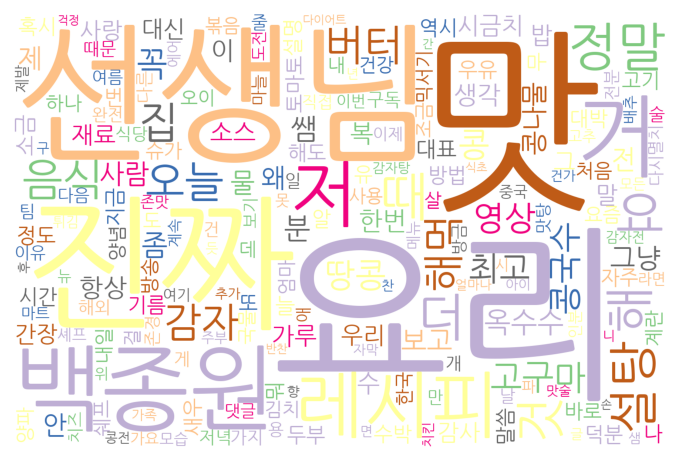

In [49]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/drive/MyDrive/Zipbob_textmining/Nanum.TTF', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()